<a href="https://colab.research.google.com/github/abhijain1216/Airbnb-Bookings-Analysis-EDA/blob/main/Airbnb_Bookings_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Nmae** - Abhinav Jain

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

# **Problem Statement**


Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world.Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers and providers (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

#### **Define Your Business Objective?**

The business's objective in this project is to discover key insights from exploratory data analysis about factors that influence the price of listings and Airbnb bookings in New York, and the results of this information will be useful in making business decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
airbnb = pd.read_csv('/content/drive/MyDrive/Projects/Almabetter EDA Capstone Project/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
airbnb.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print('No. of Rows :',airbnb.shape[0])
print('No. of Columns :',airbnb.shape[1])

No. of Rows : 48895
No. of Columns : 16


### Dataset Information

In [7]:
# Dataset Info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_values = airbnb.duplicated().value_counts()  
duplicate_values

False    48895
dtype: int64

There is no duplicate values.All rows are unique.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
missing_values = airbnb.isnull().sum().reset_index().rename(columns = {'index':'column_name',0:'total_missing_values'})
missing_values 

,column_name,total_missing_values
0,id,0
1,name,16
2,host_id,0
3,host_name,21
4,neighbourhood_group,0
5,neighbourhood,0
6,latitude,0
7,longitude,0
8,room_type,0
9,price,0


<Axes: >

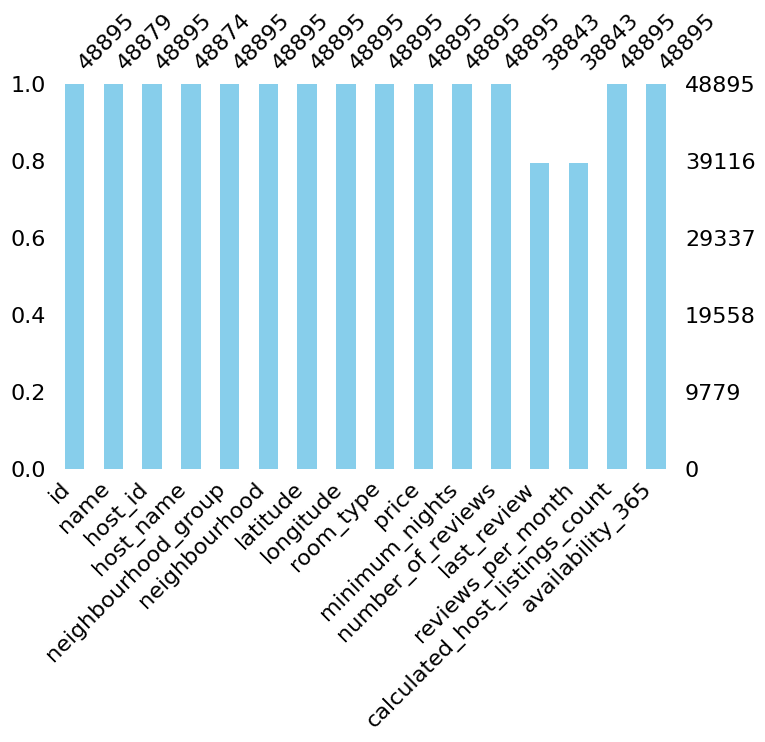

In [10]:
# Visualizing the missing values
msno.bar(airbnb,figsize=(8,5),color = 'skyblue')

### What did you know about your dataset?

* This Airbnb dataset comprising of the bookings made in New York City in 2019.
* This dataset has around 49,000 observations with 16 columns and it includes numerical as well as categorical data.
* This dataset will be helpful for analysing the preferences of customers in terms of locations, room types, and prices across New York which will be used to take business decisions.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

* **id** : Unique listing id
* **name** : Name of the listing
* **host_id** : Unique host id
* **host_name** : Name of the host
* **neighbourhood_group** : Location
* **neighbourhood** : Area fall under neighbourhood group
* **latitude** : Latitude Coordinates
* **longitude** : Longitude Coordinates
* **room_type** : Listing space type
* **price** : Price of listing
* **minimum_nights** : Minimum nights to be paid for
* **number_of_reviews** : Number of reviews given
* **last_review** : Date of last review given
* **reviews_per_month** : Number of reviews per month
* **calculated_host_listings_count** : Amount of Listing per host
* **availability_365** : Number of days when listing is available for booking

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
print(airbnb.apply(lambda col: col.unique()))

id                                [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...
name                              [Clean & quiet apt home by the park, Skylit Mi...
host_id                           [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...
host_name                         [John, Jennifer, Elisabeth, LisaRoxanne, Laura...
neighbourhood_group               [Brooklyn, Manhattan, Queens, Staten Island, B...
neighbourhood                     [Kensington, Midtown, Harlem, Clinton Hill, Ea...
latitude                          [40.64749, 40.75362, 40.80902, 40.68514, 40.79...
longitude                         [-73.97237, -73.98377, -73.9419, -73.95976, -7...
room_type                              [Private room, Entire home/apt, Shared room]
price                             [149, 225, 150, 89, 80, 200, 60, 79, 135, 85, ...
minimum_nights                    [1, 3, 10, 45, 2, 5, 4, 90, 7, 14, 60, 29, 30,...
number_of_reviews                 [9, 45, 0, 270, 74, 49, 430, 118, 160, 53,

## 3. ***Data Wrangling***

### Data Wrangling Code

Write your code to make your dataset analysis ready.

In [14]:
# Remove unnecessary columns
airbnb.drop(columns = ['last_review','name','id'],inplace = True)

* We have removed some columns from our dataset that are not much important for our analysis
* last_review column has 10052 null values and has less importance than reviews_per_month thats why we have removed last_review column.

In [15]:
# Replace null values for column review_per_month
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

* Here we've replaced nan values with zero because  we are assuming that the rows for which reviews per month are not avaiable, they are actually having zero reviews and this can be a real scenario.

In [16]:
# Replace null values for host_name with 'unknown'
airbnb['host_name'].fillna('Unknown',inplace=True)

In [17]:
# After replacing all the  null values let's check dataframe info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

* Now, there are no null values or missing values 

In [18]:
# let's have a look at statistical description of numerical columns of dataset
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* From the above stastical description it is clear  that there is a flaw for price column that is, the minimum price is zero which is not possible. So we will going to replace min price with the average of prices that are less than 100 (i.e approximately less than 50 percentile value).

* From description it is also clear that columns like price,minimum_nights,number_of_reviews, reviews_per_month are having outliers.

In [19]:
# Replace the minimum price with average of price less than 100
min_avg_price = round(airbnb.loc[airbnb['price'] < 100,'price'].mean())
airbnb.loc[airbnb['price']==0,'price'] = min_avg_price

In [20]:
# Let's check price description 
airbnb.price.describe()

count    48895.000000
mean       152.735310
std        240.146849
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [21]:
# Numerical and Categorical Features
numerical_features = []
categorical_features = []
for column in list(airbnb.columns):
    if (airbnb[column].dtype) !='object':
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Numerical Features:',numerical_features)
print('\n')
print('Categorical Features:',categorical_features)

Numerical Features: ['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Categorical Features: ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


### What all manipulations have you done and insights you found?

* Removed unwanted columns that have no relevance in the current EDA analysis from the dataframe.
* Replaced all the missing values/null values with relevant values.
* Replaced the minimum price for listing, which was zero previously, with the mean of the prices that are less than 100.
* It is obvious from the statistical description of numerical columns that some of the columns, such as price, minimum_nights, number_of_reviews, and reviews_per_month, have outliers. 
* Created Variable for numerical and categorical features.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univariate Analysis

#### Chart - 1

Distribution of numerical columns

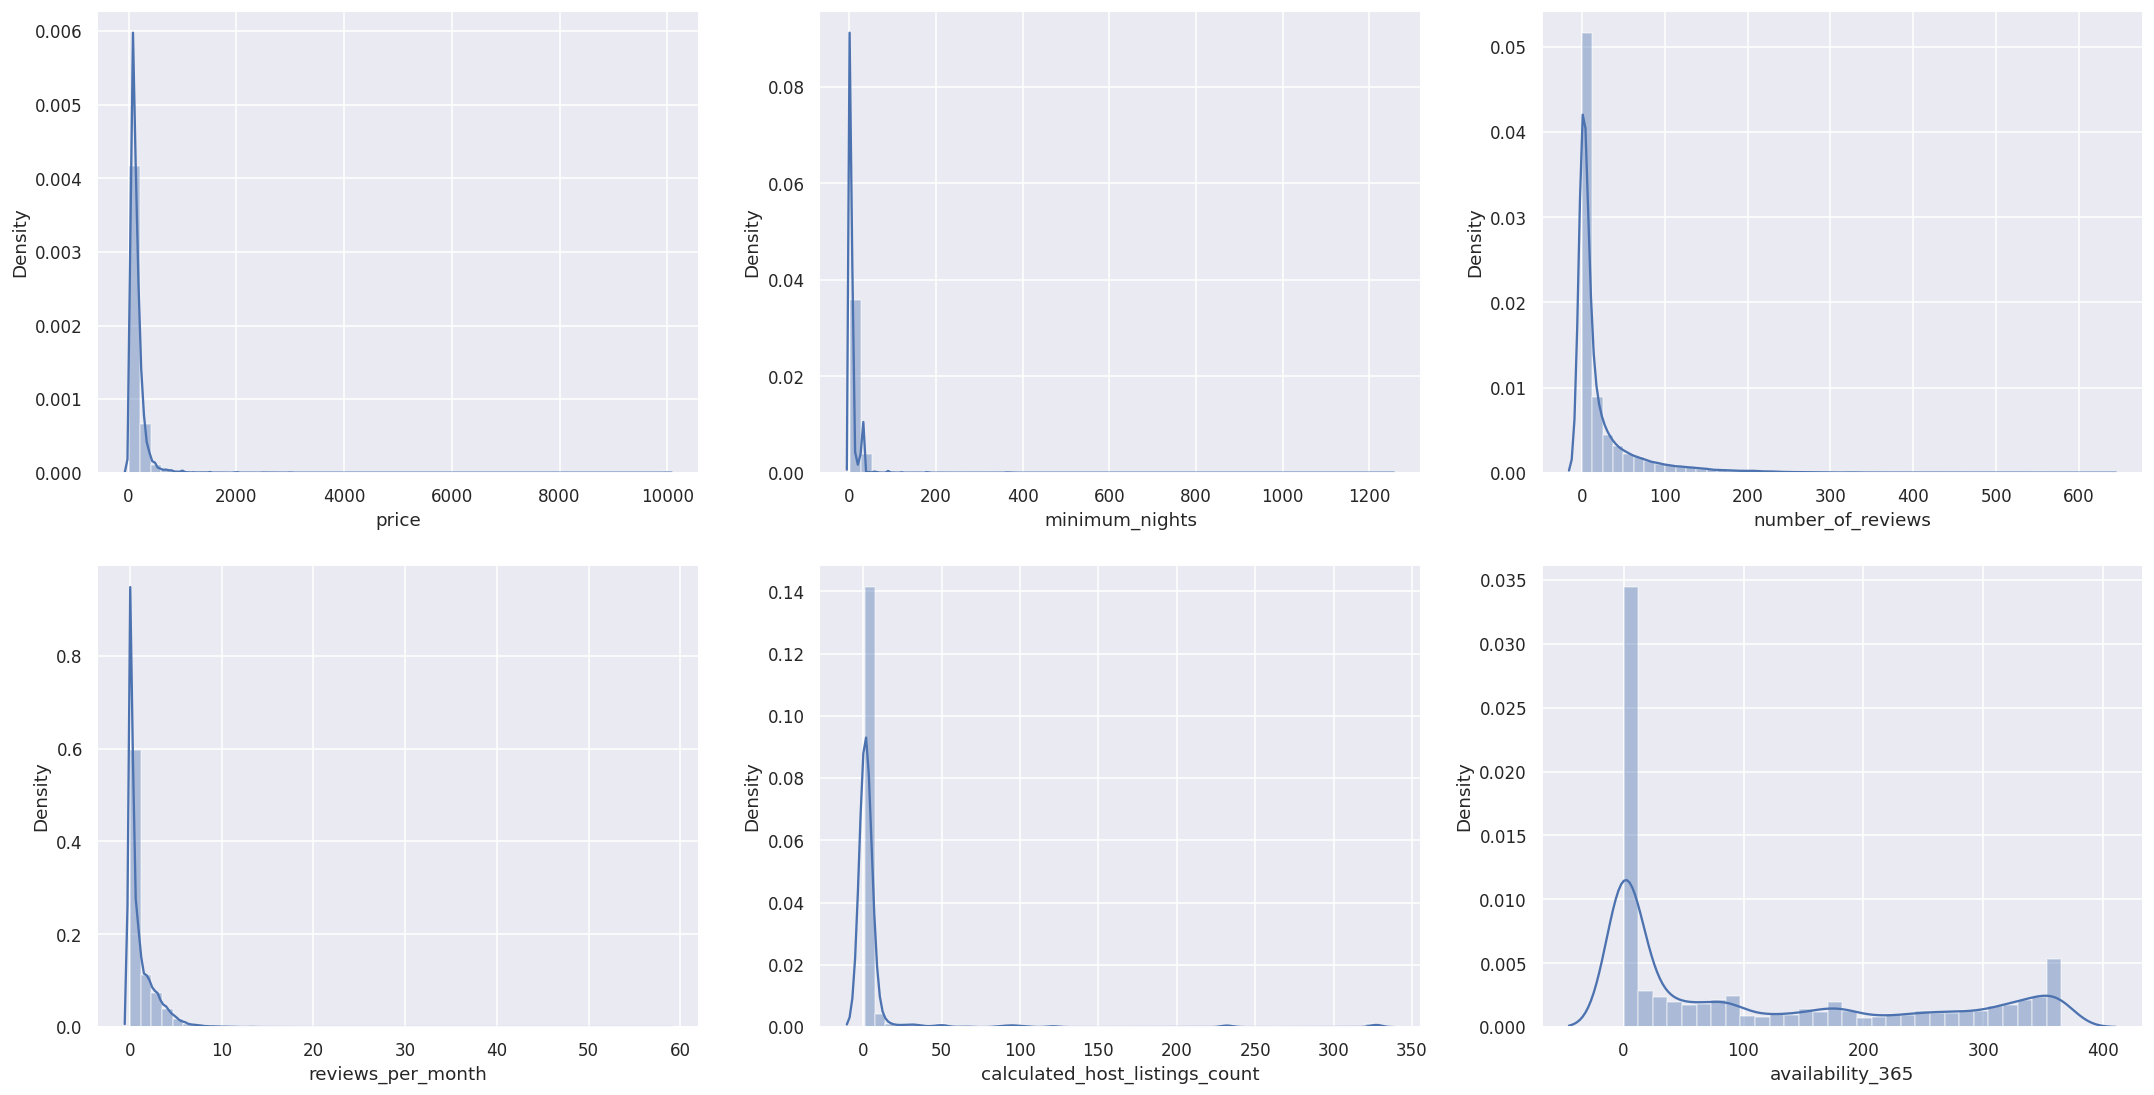

In [22]:
# Chart - 1 visualization code
# Create a new variable for numerical features by removing columns like 'host_id', 'latitude', 'longitude' 
num_features = [feature for feature in numerical_features if feature not in ['host_id', 'latitude', 'longitude']]

# Visulization
sns.set_theme()
fig,axes = plt.subplots(nrows=2, ncols=3,figsize = (24,12),dpi = 110)
for feature,axes in zip(num_features,axes.ravel()):
    sns.distplot(airbnb[feature],ax = axes)
plt.show()

##### 1. Why did you pick the specific chart?

Distribution plots plot a univariate distribution of data and are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).That's why, to find some insights about numerical columns, a distribution plot is used.

##### 2. What is/are the insight(s) found from the chart?

* According to the distribution of numerical columns, all of the features have a positively skewed distribution, with the exception of the availability column, which distributed uniformly throughout the year. 

* The price column contains outliers, but we can't simply remove them because the reason for these outliers may be the location and type of room that justifies the price.

#### Chart - 2

Total Number of Listings For Each Neighbourhood Groups

In [23]:
# Chart - 2 visualization code

# Dataframe for Total listing count at each neighbourhood
Neighbourhood_df = airbnb['neighbourhood_group'].value_counts().reset_index().rename(columns = {'index':'neighbourhood_group','neighbourhood_group':'total_listings'})
Neighbourhood_df

,neighbourhood_group,total_listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


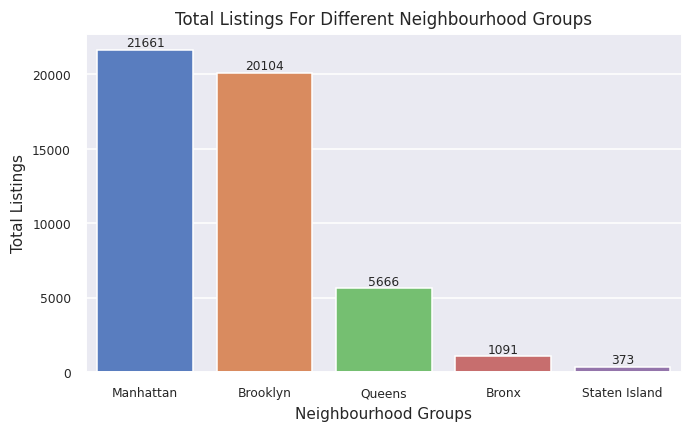

In [24]:
# Visualiztion using bar plot
plt.figure(figsize = (7,4),dpi = 110)
plot = sns.barplot(data = Neighbourhood_df , x = 'neighbourhood_group',y = 'total_listings',palette = 'muted')
plt.bar_label(plot.containers[0], label_type='edge',size = 8)
plt.title('Total Listings For Different Neighbourhood Groups',fontsize=11)
plt.ylabel('Total Listings',fontsize=10)
plt.xlabel('Neighbourhood Groups',fontsize=10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

##### 1. Why did you pick the specific chart?

Here a bar chart is used because it summarises a large amount of data in a visual, easily interpretable form and is used to describe the comparison between the different categorical or discrete variables, as long as there are not too many to compare.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan and Brooklyn have the most listings, with over 20,000 each, compared to other neighbourhood groups.
* Staten Island has only 373 listings and hence stands last in the list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Despite having a larger geographical area than Manhattan and Brooklyn, Queens has very few listings. So, increasing the number of listings in Queen may result in positive business growth.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***